# Necessary Code Blocks to Run

In [4]:
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive')

df = pd.read_csv('/content/gdrive/My Drive/covid19deaths.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
df1 = df.groupby('Province_State').sum()
df1

,UID,code3,FIPS,Lat,Long_,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,...,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20
Province_State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,5796241491,57960,241491.0,2203.246784,-5809.578199,4903185,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,549,551,566,580,583,591,610,618,630,646,653,653,653,676,689,692,718,729,744,755,769,773,773,774,785,790,810,822,838,839,841,864,891,896,907,919,919,929,950,972
Alaska,2604232344,26040,232344.0,1747.579877,-4229.319334,731545,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,11,11,11,12,12,12,12,12,12,12,12,12,12,12,12,12,12,14,14,14,14,14,14
American Samoa,16,16,60.0,-14.271000,-170.132000,55641,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Arizona,1428230216,14280,230216.0,505.138555,-1671.948482,7278717,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,801,801,807,810,834,860,886,904,907,918,943,983,999,1015,1043,1051,1053,1076,1101,1135,1156,1189,1191,1203,1228,1249,1283,1321,1346,1349,1351,1396,1467,1495,1536,1580,1594,1598,1645,1725
Arkansas,6468550635,64680,550635.0,2618.391704,-6932.548370,3017804,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,115,116,117,119,120,125,132,133,133,133,136,142,151,152,154,154,155,161,165,171,176,177,179,182,188,197,208,214,224,225,227,237,240,240,249,259,264,265,270,277
California,5040521376,50400,521376.0,2194.949775,-7002.258461,39512223,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3737,3753,3768,3818,3894,3993,4077,4144,4172,4217,4305,4374,4444,4529,4607,4632,4657,4745,4854,4934,4978,5076,5099,5114,5200,5271,5355,5426,5494,5515,5566,5626,5725,5806,5868,5899,5932,5983,6082,6169
Colorado,5544685999,55440,685999.0,2491.870366,-6751.119357,5758736,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1327,1332,1333,1352,1392,1421,1436,1443,1445,1458,1474,1494,1512,1524,1527,1527,1543,1553,1572,1582,1582,1597,1598,1605,1617,1631,1638,1643,1647,1647,1651,1665,1667,1669,1673,1674,1676,1681,1690,1697
Connecticut,840242082,8400,242082.0,332.909441,-581.254637,3565287,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3675,3693,3742,3769,3803,3826,3868,3912,3944,3970,3972,3989,4007,4038,4055,4071,4084,4097,4120,4146,4159,4186,4201,4204,4210,4219,4226,4238,4251,4260,4263,4277,4287,4298,4307,4311,4316,4320,4322,4324
Delaware,420200029,4200,200029.0,117.327830,-226.599712,973764,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,322,326,332,335,344,345,356,361,366,368,373,375,386,388,390,398,398,410,413,414,414,419,422,423,424,426,431,433,434,435,435,504,505,507,507,507,507,507,509,509


In [6]:
df1 = df1.reset_index()

In [7]:
df1 = df1.loc[~df1['Province_State'].isin(['American Samoa','Northern Mariana Islands', 'Grand Princess', 'Diamond Princess', 'Guam', 'District of Columbia', 'Puerto Rico', 'Virgin Islands'])]

In [8]:
area = ['S', 'W', 'SW', 'S', 'W', 'W', 'NE', 'MA', 'S', 'S', 'W', 'W', 'MW', 'MW', 'MW', 'MW', 'S', 'S', 'NE', 'MA', 'NE', 'MW', 'MW', 'S', 'MW', 'W', 'MW', 'W', 'NE', 'MA', 'SW', 'MA', 'S', 'MW', 'MW', 'SW', 'W', 'MA', 'NE', 'S', 'MW', 'S', 'SW', 'W', 'NE', 'S', 'W', 'S', 'MW', 'W']
df1['Area'] = area

In [9]:
df1 = df1.melt(['UID','code3','FIPS','Lat','Long_','Population', 'Province_State', 'Area'])
df1

,UID,code3,FIPS,Lat,Long_,Population,Province_State,Area,variable,value
0,5796241491,57960,241491.0,2203.246784,-5809.578199,4903185,Alabama,S,1/22/20,0
1,2604232344,26040,232344.0,1747.579877,-4229.319334,731545,Alaska,W,1/22/20,0
2,1428230216,14280,230216.0,505.138555,-1671.948482,7278717,Arizona,SW,1/22/20,0
3,6468550635,64680,550635.0,2618.391704,-6932.548370,3017804,Arkansas,S,1/22/20,0
4,5040521376,50400,521376.0,2194.949775,-7002.258461,39512223,California,W,1/22/20,0
...,...,...,...,...,...,...,...,...,...,...
8095,11346988213,113400,6988213.0,4996.297993,-10442.323661,8535519,Virginia,S,7/1/20,1786
8096,3446238627,34440,2238627.0,1842.117670,-4708.049596,7614893,Washington,W,7/1/20,1339
8097,4791143133,47880,3143133.0,2134.783954,-4433.959998,1792147,West Virginia,S,7/1/20,93
8098,6220135229,62160,4135229.0,3196.450332,-6465.454559,5822434,Wisconsin,MW,7/1/20,786


In [10]:
df1.Province_State.unique()
states = list(df1.Province_State.unique())

In [11]:
state = 'California'
tempdf = df1.loc[df1['Province_State'] == state]


In [12]:
len('Area')

4

In [13]:
df1 = df1.join(pd.get_dummies(df1['Area'], prefix = 'Area1'))
df1

,UID,code3,FIPS,Lat,Long_,Population,Province_State,Area,variable,value,Area1_MA,Area1_MW,Area1_NE,Area1_S,Area1_SW,Area1_W
0,5796241491,57960,241491.0,2203.246784,-5809.578199,4903185,Alabama,S,1/22/20,0,0,0,0,1,0,0
1,2604232344,26040,232344.0,1747.579877,-4229.319334,731545,Alaska,W,1/22/20,0,0,0,0,0,0,1
2,1428230216,14280,230216.0,505.138555,-1671.948482,7278717,Arizona,SW,1/22/20,0,0,0,0,0,1,0
3,6468550635,64680,550635.0,2618.391704,-6932.548370,3017804,Arkansas,S,1/22/20,0,0,0,0,1,0,0
4,5040521376,50400,521376.0,2194.949775,-7002.258461,39512223,California,W,1/22/20,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8095,11346988213,113400,6988213.0,4996.297993,-10442.323661,8535519,Virginia,S,7/1/20,1786,0,0,0,1,0,0
8096,3446238627,34440,2238627.0,1842.117670,-4708.049596,7614893,Washington,W,7/1/20,1339,0,0,0,0,0,1
8097,4791143133,47880,3143133.0,2134.783954,-4433.959998,1792147,West Virginia,S,7/1/20,93,0,0,0,1,0,0
8098,6220135229,62160,4135229.0,3196.450332,-6465.454559,5822434,Wisconsin,MW,7/1/20,786,0,1,0,0,0,0


In [14]:
df1['variable'] = pd.to_datetime(df1['variable'])

In [15]:
otherdate = df1.iloc[0]['variable']
df1['number_of_days'] = (df1['variable'] - otherdate).dt.days
df1['number_of_days']

0         0
1         0
2         0
3         0
4         0
       ... 
8095    161
8096    161
8097    161
8098    161
8099    161
Name: number_of_days, Length: 8100, dtype: int64

In [16]:
df1

,UID,code3,FIPS,Lat,Long_,Population,Province_State,Area,variable,value,Area1_MA,Area1_MW,Area1_NE,Area1_S,Area1_SW,Area1_W,number_of_days
0,5796241491,57960,241491.0,2203.246784,-5809.578199,4903185,Alabama,S,2020-01-22,0,0,0,0,1,0,0,0
1,2604232344,26040,232344.0,1747.579877,-4229.319334,731545,Alaska,W,2020-01-22,0,0,0,0,0,0,1,0
2,1428230216,14280,230216.0,505.138555,-1671.948482,7278717,Arizona,SW,2020-01-22,0,0,0,0,0,1,0,0
3,6468550635,64680,550635.0,2618.391704,-6932.548370,3017804,Arkansas,S,2020-01-22,0,0,0,0,1,0,0,0
4,5040521376,50400,521376.0,2194.949775,-7002.258461,39512223,California,W,2020-01-22,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8095,11346988213,113400,6988213.0,4996.297993,-10442.323661,8535519,Virginia,S,2020-07-01,1786,0,0,0,1,0,0,161
8096,3446238627,34440,2238627.0,1842.117670,-4708.049596,7614893,Washington,W,2020-07-01,1339,0,0,0,0,0,1,161
8097,4791143133,47880,3143133.0,2134.783954,-4433.959998,1792147,West Virginia,S,2020-07-01,93,0,0,0,1,0,0,161
8098,6220135229,62160,4135229.0,3196.450332,-6465.454559,5822434,Wisconsin,MW,2020-07-01,786,0,1,0,0,0,0,161


In [17]:
df1.Province_State.unique()
states = list(df1.Province_State.unique())

In [18]:
for state in states:
  print(state)
  statedf = df1.loc[df1['Province_State'] == state]
  firstdeath = statedf.loc[statedf['value'] != 0].iloc[0]['variable']
  print(firstdeath)
  df1.loc[df1['Province_State'] == state, 'firstdeath'] = firstdeath

Alabama
2020-03-25 00:00:00
Alaska
2020-03-25 00:00:00
Arizona
2020-03-21 00:00:00
Arkansas
2020-03-24 00:00:00
California
2020-03-04 00:00:00
Colorado
2020-03-12 00:00:00
Connecticut
2020-03-18 00:00:00
Delaware
2020-03-26 00:00:00
Florida
2020-03-08 00:00:00
Georgia
2020-03-12 00:00:00
Hawaii
2020-03-24 00:00:00
Idaho
2020-03-26 00:00:00
Illinois
2020-03-17 00:00:00
Indiana
2020-03-16 00:00:00
Iowa
2020-03-25 00:00:00
Kansas
2020-03-13 00:00:00
Kentucky
2020-03-16 00:00:00
Louisiana
2020-03-14 00:00:00
Maine
2020-03-27 00:00:00
Maryland
2020-03-19 00:00:00
Massachusetts
2020-03-20 00:00:00
Michigan
2020-03-12 00:00:00
Minnesota
2020-03-21 00:00:00
Mississippi
2020-03-19 00:00:00
Missouri
2020-03-18 00:00:00
Montana
2020-03-27 00:00:00
Nebraska
2020-03-28 00:00:00
Nevada
2020-03-16 00:00:00
New Hampshire
2020-03-23 00:00:00
New Jersey
2020-03-10 00:00:00
New Mexico
2020-03-25 00:00:00
New York
2020-03-11 00:00:00
North Carolina
2020-03-25 00:00:00
North Dakota
2020-03-27 00:00:00
Ohio

In [19]:
df1

,UID,code3,FIPS,Lat,Long_,Population,Province_State,Area,variable,value,Area1_MA,Area1_MW,Area1_NE,Area1_S,Area1_SW,Area1_W,number_of_days,firstdeath
0,5796241491,57960,241491.0,2203.246784,-5809.578199,4903185,Alabama,S,2020-01-22,0,0,0,0,1,0,0,0,2020-03-25
1,2604232344,26040,232344.0,1747.579877,-4229.319334,731545,Alaska,W,2020-01-22,0,0,0,0,0,0,1,0,2020-03-25
2,1428230216,14280,230216.0,505.138555,-1671.948482,7278717,Arizona,SW,2020-01-22,0,0,0,0,0,1,0,0,2020-03-21
3,6468550635,64680,550635.0,2618.391704,-6932.548370,3017804,Arkansas,S,2020-01-22,0,0,0,0,1,0,0,0,2020-03-24
4,5040521376,50400,521376.0,2194.949775,-7002.258461,39512223,California,W,2020-01-22,0,0,0,0,0,0,1,0,2020-03-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8095,11346988213,113400,6988213.0,4996.297993,-10442.323661,8535519,Virginia,S,2020-07-01,1786,0,0,0,1,0,0,161,2020-03-14
8096,3446238627,34440,2238627.0,1842.117670,-4708.049596,7614893,Washington,W,2020-07-01,1339,0,0,0,0,0,1,161,2020-02-29
8097,4791143133,47880,3143133.0,2134.783954,-4433.959998,1792147,West Virginia,S,2020-07-01,93,0,0,0,1,0,0,161,2020-03-30
8098,6220135229,62160,4135229.0,3196.450332,-6465.454559,5822434,Wisconsin,MW,2020-07-01,786,0,1,0,0,0,0,161,2020-03-19


In [20]:
df1['dayssincefirst'] = (df1['variable'] - df1['firstdeath']).dt.days
df1['dayssincefirst']

0       -63
1       -63
2       -59
3       -62
4       -42
       ... 
8095    109
8096    123
8097     93
8098    104
8099     79
Name: dayssincefirst, Length: 8100, dtype: int64

In [21]:
#if (df1['variable'] - df1['firstdeath']) >= 0:

In [22]:
for state in states:
  print(state)
  statedf = df1.loc[df1['Province_State'] == state]
  print(statedf.loc[statedf['value'] != 0].iloc[0])
  

Alabama
UID                        5796241491
code3                           57960
FIPS                           241491
Lat                           2203.25
Long_                        -5809.58
Population                    4903185
Province_State                Alabama
Area                                S
variable          2020-03-25 00:00:00
value                               1
Area1_MA                            0
Area1_MW                            0
Area1_NE                            0
Area1_S                             1
Area1_SW                            0
Area1_W                             0
number_of_days                     63
firstdeath        2020-03-25 00:00:00
dayssincefirst                      0
Name: 3150, dtype: object
Alaska
UID                        2604232344
code3                           26040
FIPS                           232344
Lat                           1747.58
Long_                        -4229.32
Population                     731545
Province_

# Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
 
scaled = scaler.fit_transform(df1[['Population',
 'value',]])
 
 
df1_scaled = pd.DataFrame(data=scaled, columns=['Population_Scaled',
 'Deaths_Scaled',])
 
df1 = df1.join(df1_scaled)

df1.head()

,UID,code3,FIPS,Lat,Long_,Population,Province_State,Area,variable,value,Area1_MA,Area1_MW,Area1_NE,Area1_S,Area1_SW,Area1_W,number_of_days,firstdeath,dayssincefirst,Population_Scaled,Deaths_Scaled
0,5796241491,57960,241491.0,2203.246784,-5809.578199,4903185,Alabama,S,2020-01-22,0,0,0,0,1,0,0,0,2020-03-25,-63,-0.235536,-0.289366
1,2604232344,26040,232344.0,1747.579877,-4229.319334,731545,Alaska,W,2020-01-22,0,0,0,0,0,0,1,0,2020-03-25,-63,-0.784021,-0.289366
2,1428230216,14280,230216.0,505.138555,-1671.948482,7278717,Arizona,SW,2020-01-22,0,0,0,0,0,1,0,0,2020-03-21,-59,0.076797,-0.289366
3,6468550635,64680,550635.0,2618.391704,-6932.548370,3017804,Arkansas,S,2020-01-22,0,0,0,0,1,0,0,0,2020-03-24,-62,-0.483425,-0.289366
4,5040521376,50400,521376.0,2194.949775,-7002.258461,39512223,California,W,2020-01-22,0,0,0,0,0,0,1,0,2020-03-04,-42,4.314836,-0.289366


# Linear Regression


In [24]:
from sklearn.linear_model import LinearRegression
 
LR=LinearRegression()
 
X = df1[['Population_Scaled']]
y = df1['Deaths_Scaled']

df1

,UID,code3,FIPS,Lat,Long_,Population,Province_State,Area,variable,value,Area1_MA,Area1_MW,Area1_NE,Area1_S,Area1_SW,Area1_W,number_of_days,firstdeath,dayssincefirst,Population_Scaled,Deaths_Scaled
0,5796241491,57960,241491.0,2203.246784,-5809.578199,4903185,Alabama,S,2020-01-22,0,0,0,0,1,0,0,0,2020-03-25,-63,-0.235536,-0.289366
1,2604232344,26040,232344.0,1747.579877,-4229.319334,731545,Alaska,W,2020-01-22,0,0,0,0,0,0,1,0,2020-03-25,-63,-0.784021,-0.289366
2,1428230216,14280,230216.0,505.138555,-1671.948482,7278717,Arizona,SW,2020-01-22,0,0,0,0,0,1,0,0,2020-03-21,-59,0.076797,-0.289366
3,6468550635,64680,550635.0,2618.391704,-6932.548370,3017804,Arkansas,S,2020-01-22,0,0,0,0,1,0,0,0,2020-03-24,-62,-0.483425,-0.289366
4,5040521376,50400,521376.0,2194.949775,-7002.258461,39512223,California,W,2020-01-22,0,0,0,0,0,0,1,0,2020-03-04,-42,4.314836,-0.289366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8095,11346988213,113400,6988213.0,4996.297993,-10442.323661,8535519,Virginia,S,2020-07-01,1786,0,0,0,1,0,0,161,2020-03-14,109,0.242041,0.276693
8096,3446238627,34440,2238627.0,1842.117670,-4708.049596,7614893,Washington,W,2020-07-01,1339,0,0,0,0,0,1,161,2020-02-29,123,0.120997,0.135020
8097,4791143133,47880,3143133.0,2134.783954,-4433.959998,1792147,West Virginia,S,2020-07-01,93,0,0,0,1,0,0,161,2020-03-30,93,-0.644573,-0.259891
8098,6220135229,62160,4135229.0,3196.450332,-6465.454559,5822434,Wisconsin,MW,2020-07-01,786,0,1,0,0,0,0,161,2020-03-19,104,-0.114674,-0.040249


In [25]:
df1

,UID,code3,FIPS,Lat,Long_,Population,Province_State,Area,variable,value,Area1_MA,Area1_MW,Area1_NE,Area1_S,Area1_SW,Area1_W,number_of_days,firstdeath,dayssincefirst,Population_Scaled,Deaths_Scaled
0,5796241491,57960,241491.0,2203.246784,-5809.578199,4903185,Alabama,S,2020-01-22,0,0,0,0,1,0,0,0,2020-03-25,-63,-0.235536,-0.289366
1,2604232344,26040,232344.0,1747.579877,-4229.319334,731545,Alaska,W,2020-01-22,0,0,0,0,0,0,1,0,2020-03-25,-63,-0.784021,-0.289366
2,1428230216,14280,230216.0,505.138555,-1671.948482,7278717,Arizona,SW,2020-01-22,0,0,0,0,0,1,0,0,2020-03-21,-59,0.076797,-0.289366
3,6468550635,64680,550635.0,2618.391704,-6932.548370,3017804,Arkansas,S,2020-01-22,0,0,0,0,1,0,0,0,2020-03-24,-62,-0.483425,-0.289366
4,5040521376,50400,521376.0,2194.949775,-7002.258461,39512223,California,W,2020-01-22,0,0,0,0,0,0,1,0,2020-03-04,-42,4.314836,-0.289366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8095,11346988213,113400,6988213.0,4996.297993,-10442.323661,8535519,Virginia,S,2020-07-01,1786,0,0,0,1,0,0,161,2020-03-14,109,0.242041,0.276693
8096,3446238627,34440,2238627.0,1842.117670,-4708.049596,7614893,Washington,W,2020-07-01,1339,0,0,0,0,0,1,161,2020-02-29,123,0.120997,0.135020
8097,4791143133,47880,3143133.0,2134.783954,-4433.959998,1792147,West Virginia,S,2020-07-01,93,0,0,0,1,0,0,161,2020-03-30,93,-0.644573,-0.259891
8098,6220135229,62160,4135229.0,3196.450332,-6465.454559,5822434,Wisconsin,MW,2020-07-01,786,0,1,0,0,0,0,161,2020-03-19,104,-0.114674,-0.040249


# Download CSV

# FIND OUT HOW TO TRANSFER DATA SETS BETWEEN COLAB NOTEBOOKS

In [26]:
from google.colab import files
files.download('Coronavirus Data Set.ipynb.csv')

FileNotFoundError: ignored

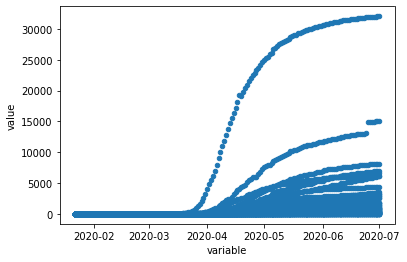

In [28]:
df1.plot(kind= 'scatter', x = 'variable', y = 'value')

In [ ]:
AL = df1.loc[df1.Province_State == 'Alabama']
AK = df1.loc[df1.Province_State == 'Alaska']
AZ = df1.loc[df1.Province_State == 'Arizona']
AR = df1.loc[df1.Province_State == 'Arkansas']
CA = df1.loc[df1.Province_State == 'California']
CO = df1.loc[df1.Province_State == 'Colorado']
CT = df1.loc[df1.Province_State == 'Connecticut']
DE = df1.loc[df1.Province_State == 'Delaware']
FL = df1.loc[df1.Province_State == 'Floride']
GA = df1.loc[df1.Province_State == 'Georgia']
HI = df1.loc[df1.Province_State == 'Hawaii']
ID = df1.loc[df1.Province_State == 'Idaho']
IL = df1.loc[df1.Province_State == 'Illinois']
IN = df1.loc[df1.Province_State == 'Indiana']
IA = df1.loc[df1.Province_State == 'Iowa']
KS = df1.loc[df1.Province_State == 'Kansas']
KY = df1.loc[df1.Province_State == 'Kentucy']
LA = df1.loc[df1.Province_State == 'Louisiana']
ME = df1.loc[df1.Province_State == 'Maine']
MD = df1.loc[df1.Province_State == 'Maryland']
MA = df1.loc[df1.Province_State == 'Massachusetts']
MI = df1.loc[df1.Province_State == 'Michigan']
MN = df1.loc[df1.Province_State == 'Minnesota']
MS = df1.loc[df1.Province_State == 'Mississippi']
MO = df1.loc[df1.Province_State == 'Missouri']
MT = df1.loc[df1.Province_State == 'Montana']
NE = df1.loc[df1.Province_State == 'Nebraska']
NV = df1.loc[df1.Province_State == 'Nevada']
NH = df1.loc[df1.Province_State == 'New Hampshire']
NJ = df1.loc[df1.Province_State == 'New Jersey']
NM = df1.loc[df1.Province_State == 'New Mexico']
NY = df1.loc[df1.Province_State == 'New York']
NC = df1.loc[df1.Province_State == 'North Carolina']
ND = df1.loc[df1.Province_State == 'North Dakota']
OH = df1.loc[df1.Province_State == 'Ohio']
OK = df1.loc[df1.Province_State == 'Oklahoma']
OR = df1.loc[df1.Province_State == 'Oregon']
PA = df1.loc[df1.Province_State == 'Pennsylvania']
RI = df1.loc[df1.Province_State == 'Rhode Island']
SC = df1.loc[df1.Province_State == 'South Carolina']
SD = df1.loc[df1.Province_State == 'South Dakota']
TN = df1.loc[df1.Province_State == 'Tennessee']
TX = df1.loc[df1.Province_State == 'Texas']
UT = df1.loc[df1.Province_State == 'Utah']
VT = df1.loc[df1.Province_State == 'Vermont']
VA = df1.loc[df1.Province_State == 'Virginia']
WA = df1.loc[df1.Province_State == 'Washington']
WV = df1.loc[df1.Province_State == 'West Virginia']
WI = df1.loc[df1.Province_State == 'Wisconsin']
WY = df1.loc[df1.Province_State == 'Wyoming']
DC = df1.loc[df1.Province_State == 'District of Columbia']
PR = df1.loc[df1.Province_State == 'Puerto Rico']
AS = df1.loc[df1.Province_State == 'American Samoa']
GU = df1.loc[df1.Province_State == 'Guam']
NI = df1.loc[df1.Province_State == 'Northern Mariana Islands']
VI = df1.loc[df1.Province_State == 'Virgin Islands']
DP = df1.loc[df1.Province_State == 'Diamond Princess']
GP = df1.loc[df1.Province_State == 'Grand Princess']

In [ ]:
NY.plot(kind = 'scatter', x = 'variable' , y = 'value')

In [ ]:
df1.Province_State.unique()
states = list(df1.Province_State.unique())

In [ ]:
state = 'New York'
tempdf = df1.loc[df1['Province_State'] == state]
tempdf.plot(kind = 'scatter', x = 'value', y = 'Population')

In [ ]:
for state in states:
  print(state)
  df1.loc[df1['Province_State'] == state]  
  tempdf['pct'] = tempdf['value'].pct_change()
  #print(tempdf['pct'].mean())

In [ ]:
import numpy as np 
tempdf.loc[~np.isfinite(tempdf['pct'])] 

In [ ]:
df1['variable'] = pd.to_datetime(df1['variable'])
df1

In [ ]:
list(df1)
dates = [x for x in list(df1) if '/' in x]
pd.melt(df, id_vars=['Province_State'], value_vars=['7/1/20'])

In [ ]:
totaldeaths = df1['7/1/20'].sum()
avgdeaths = totaldeaths/58

df1['aboveavgdeaths'] = 0
df1.loc[df1['7/1/20'] > avgdeaths, 'aboveavgdeaths'] = 1
df1

df1.plot(kind = 'scatter', x = (df1['aboveavgdeaths'] == 1), y = 'Population')

# Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
 
KNN = KNeighborsClassifier(n_neighbors=5)
 
X = df1[['Population']]
y = df1['value']
 
KNN.fit(X, y)
 
df1['prediction'] = KNN.predict(X)
df1[['value','prediction']].sample(20)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(accuracy_score(df1['value'],df1['prediction']))
print(recall_score(df1['value'],df1['prediction'],average='macro'))
print(precision_score(df1['value'],df1['prediction'],average='macro'))
print(f1_score(df1['value'],df1['prediction'],average='macro'))

In [ ]:
df1 = df.groupby('Province_State').sum()
print(df1)
area = ['S', 'W', 'WC', 'MW', 'NE', 'NE', 'SW', 'WC', 'MW', 'NE', 'MW', 'NE', 'SW', 'WC', 'MW', 'NE', 'NE', 'SW', 'WC', 'MW', 'NE', 'NE', 'SW', 'WC', 'MW', 'NE', 'NE', 'SW', 'WC', 'MW', 'NE', 'NE', 'SW', 'WC', 'MW', 'NE', 'NE', 'SW', 'WC', 'MW', 'NE', 'NE', 'SW', 'WC', 'MW', 'NE', 'NE', 'SW', 'WC', 'MW', 'NE','MW', 'NE', 'NE', 'SW', 'WC', 'MW', 'NE']
df1['Area'] = area


# Time Series Split

# Cross-Validation

In [ ]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score


X = df1[['']]  
y = df1['value']
 
cv = TimeSeriesSplit(n_split = len(df)/58)

  
  X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
  y = np.array([1, 2, 3, 4, 5, 6])
  cv = TimeSeriesSplit(n_split = len(df)/58)
  print(tscv)
TimeSeriesSplit(max_train_size=None, n_splits=5)
  for train_index, test_index in tscv.split(X):
print("TRAIN:", train_index, "TEST:", test_index)
X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

# Sequential Feature Selection

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=5)
 
X = df_iris[['SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm']]
 
y = df_iris['Species']

In [ ]:
sfs = SFS(KNN, 
          k_features=4, 
          scoring='f1_macro',
          cv=5)
sfs = sfs.fit(X, y)
sfs.get_metric_dict()

In [ ]:
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()